<a href="https://colab.research.google.com/github/payalaggarwal177/Deepleaning-6thjuly/blob/main/Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Handwritten Digit Classification Project

In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

## load MNIST dataset

In [2]:
from keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

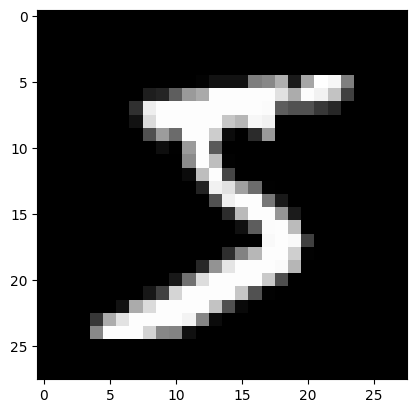

In [6]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0], cmap= 'gray')

In [7]:
xtest.shape

(10000, 28, 28)

In [8]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

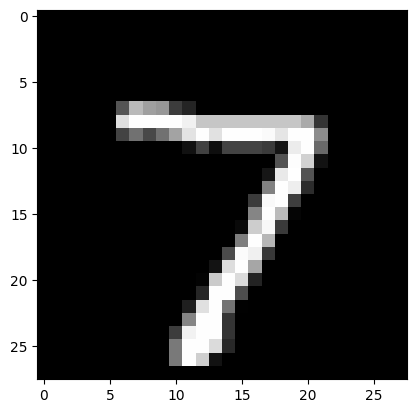

In [9]:
plt.imshow(xtest[0], cmap= 'gray')

## Display first 9 images from train data

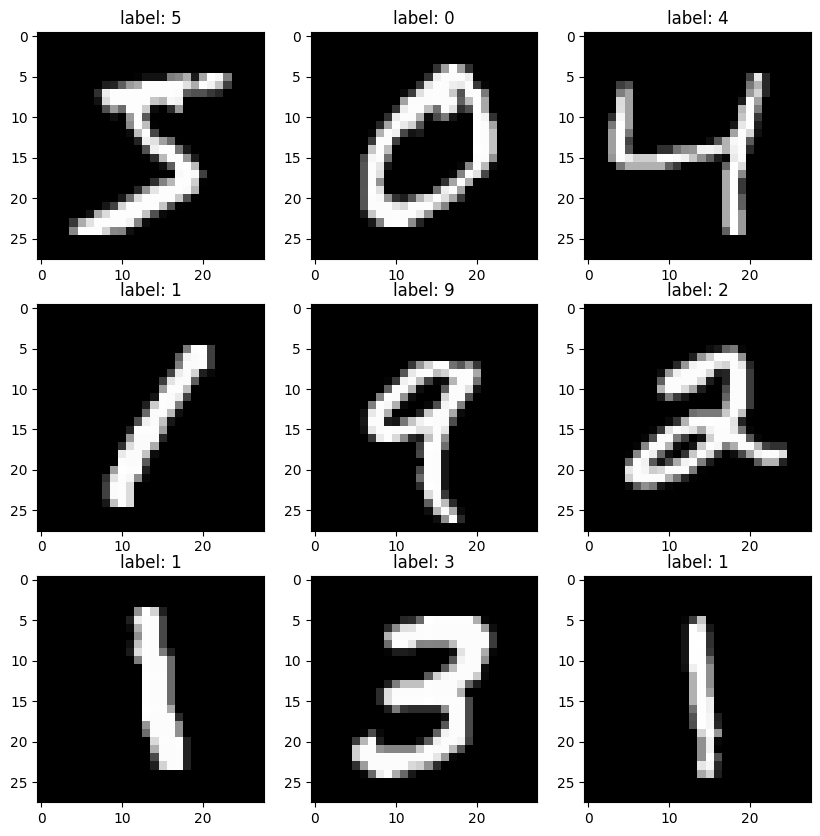

In [10]:
plt.figure(figsize = (10,10))
for i in range(9):
  plt.subplot(3, 3,i+1)
  plt.imshow(xtrain[i], cmap = 'gray')
  plt.title(f'label: {ytrain[i]}')

In [11]:
import numpy as np
np.unique(ytrain)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
len(np.unique(ytrain))

10

## This is a multiclass classification problem
## preprocess image data
### pixel value 0-255

In [15]:
xtrain_scl = xtrain.astype('float32')/255
xtest_scl = xtest.astype('float32')/255

In [16]:
xtrain_scl[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Onehot encode the y features


In [18]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [19]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [20]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

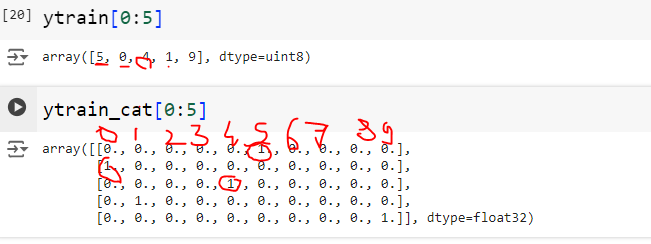

In [21]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [22]:
ytest_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
xtrain.shape

(60000, 28, 28)

## Bluid the neural network

Siple Connet architecture

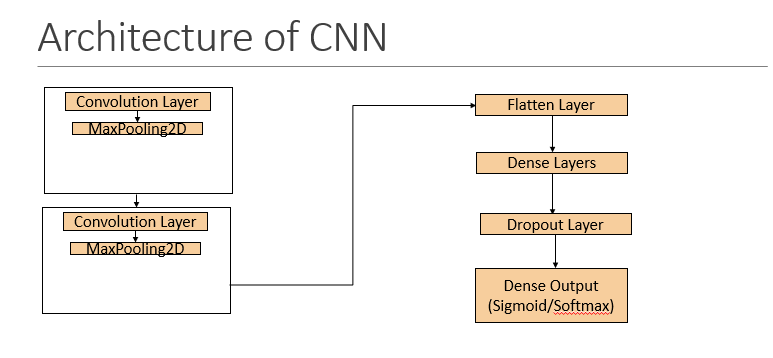

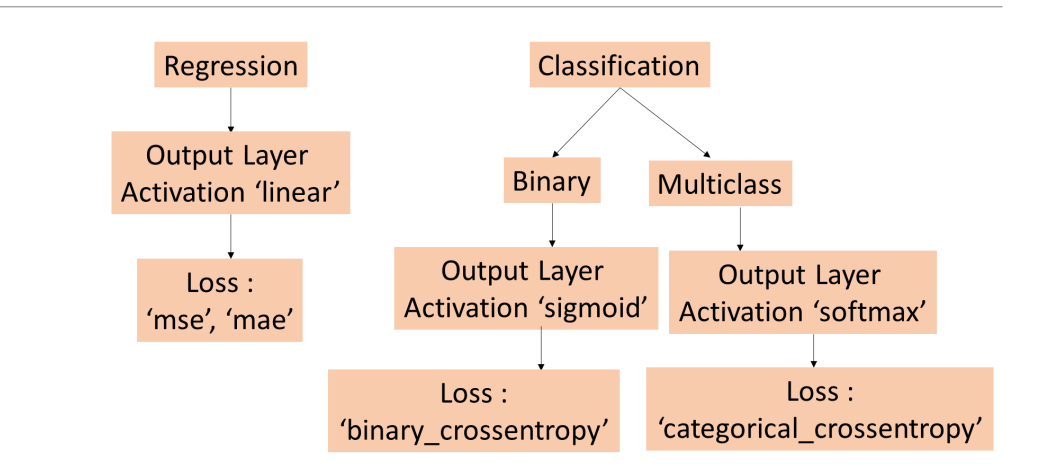

In [24]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [28]:
model = Sequential()

# Added Input Layer
model.add(Input(shape = (28, 28, 1)))

# Add Convolution Layer 1
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))

# Add Max pooling 1
model.add(MaxPooling2D(pool_size = (2,2)))

# Add Convolution Layer2
model.add(Conv2D(filters =64, kernel_size = (3, 3), activation = 'relu'))

# Add Flatten Layer
model.add (Flatten())

# Add Dropout Layer
model.add(Dropout(0.5))

# output Layer
model.add(Dense(ytrain_cat.shape[1], activation = 'softmax'))

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dropout (Dropout)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 10)                77450     
                                                      

In [30]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [33]:
hist = model.fit(xtrain_scl, ytrain_cat, epochs=15, validation_split= 0.1)

Epoch 1/15
1688/1688 [==============================] - 14s 5ms/step - loss: 0.1666 - accuracy: 0.9491 - val_loss: 0.0525 - val_accuracy: 0.9863
Epoch 2/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0639 - accuracy: 0.9802 - val_loss: 0.0391 - val_accuracy: 0.9907
Epoch 3/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0457 - accuracy: 0.9859 - val_loss: 0.0345 - val_accuracy: 0.9913
Epoch 4/15
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0380 - accuracy: 0.9883 - val_loss: 0.0345 - val_accuracy: 0.9912
Epoch 5/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0324 - accuracy: 0.9896 - val_loss: 0.0384 - val_accuracy: 0.9900
Epoch 6/15
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0273 - accuracy: 0.9909 - val_loss: 0.0373 - val_accuracy: 0.9905
Epoch 7/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0253 - accuracy: 0.9917 - val_loss: 0.0371 - val_accura

## Plot the learning curve


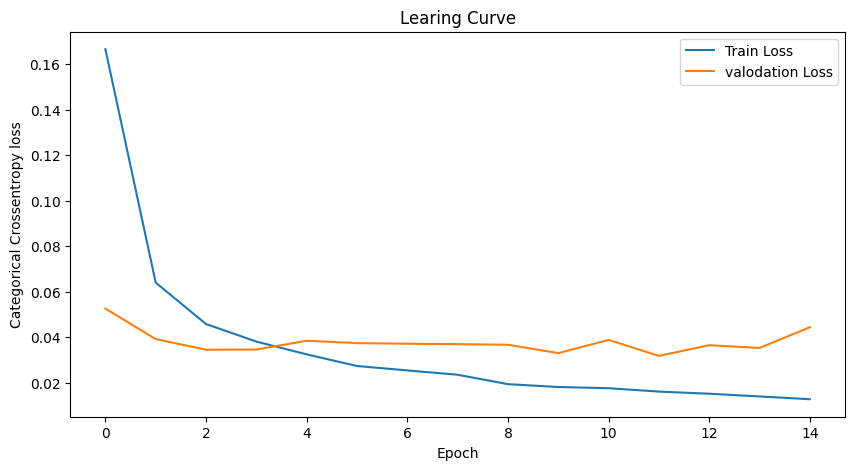

In [34]:
plt.figure(figsize= (10,5))
plt.plot(hist.history['loss'], label = 'Train Loss')
plt.plot(hist.history['val_loss'], label = 'valodation Loss')
plt.title('Learing Curve')
plt.ylabel('Categorical Crossentropy loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Evaluate the model in train and test

In [36]:
model.evaluate(xtrain_scl, ytrain_cat)


1875/1875 [==============================] - 5s 3ms/step - loss: 0.0123 - accuracy: 0.9963


[0.01225882675498724, 0.9963333606719971]

In [37]:
model.evaluate(xtest_scl, ytest_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0474 - accuracy: 0.9891


[0.04741847515106201, 0.9890999794006348]

## Predict results for train and test

In [38]:
yprob_train = model.predict(xtrain_scl)
yprob_test = model.predict(xtest_scl)

313/313 [==============================] - 2s 4ms/step


In [39]:
yprob_train[0:5]

array([[1.38901316e-18, 2.94496857e-11, 5.76963957e-16, 3.35510704e-05,
        7.21965356e-16, 9.99966502e-01, 2.57224302e-17, 1.10858772e-12,
        7.37526012e-12, 5.13443899e-10],
       [1.00000000e+00, 6.95018823e-18, 3.89503901e-10, 4.31059989e-18,
        1.91975105e-14, 2.52524397e-16, 2.28839014e-11, 3.13680505e-13,
        1.14225545e-12, 3.21085064e-12],
       [7.49894862e-22, 2.54770271e-07, 1.67891417e-13, 4.01144586e-16,
        9.99999762e-01, 5.73406026e-18, 1.23146067e-17, 2.84196156e-11,
        5.04127903e-12, 7.82131526e-10],
       [3.36570606e-16, 1.00000000e+00, 4.01924414e-12, 5.81041777e-20,
        1.11203028e-12, 6.48338407e-17, 5.48745199e-17, 1.02395852e-11,
        2.42400447e-13, 1.09010354e-16],
       [1.89787557e-15, 4.83642258e-11, 3.61557979e-13, 3.73256357e-13,
        4.37476473e-07, 1.78044343e-14, 1.12499239e-19, 2.35678659e-08,
        9.36315914e-09, 9.99999523e-01]], dtype=float32)

In [40]:
yprob_test[0:5]

array([[1.07708102e-12, 5.84816831e-15, 2.13968045e-11, 1.11842436e-12,
        4.89977541e-19, 2.47598678e-15, 3.44774262e-24, 1.00000000e+00,
        3.15863905e-14, 1.79394999e-10],
       [5.76914037e-12, 3.67678226e-08, 1.00000000e+00, 8.23986455e-19,
        1.67460095e-16, 4.34295822e-22, 1.51791552e-10, 6.43481996e-17,
        3.91636986e-16, 1.35781995e-17],
       [1.12196962e-11, 1.00000000e+00, 2.04278913e-10, 2.74844827e-14,
        8.84558871e-10, 1.50946053e-12, 1.48388815e-13, 3.84847848e-10,
        1.91657926e-10, 5.21918338e-13],
       [9.99912858e-01, 5.35838125e-15, 1.28949225e-07, 9.88128782e-14,
        7.34815264e-10, 3.79166420e-10, 8.69462092e-05, 1.64891674e-08,
        7.39077421e-09, 3.62557842e-08],
       [2.93328293e-15, 4.88372126e-14, 3.00984926e-16, 4.27731153e-20,
        1.00000000e+00, 1.03136405e-18, 1.51266810e-16, 1.22559094e-14,
        1.24214385e-15, 5.63104988e-12]], dtype=float32)

In [41]:
import numpy as np
ypred_train = np.argmax(yprob_train, axis = 1)
ypred_test = np.argmax(yprob_test, axis = 1)

In [42]:
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [43]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [44]:
ypred_test[0:5]

array([7, 2, 1, 0, 4])

In [45]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

## Plot the confusion Matrix

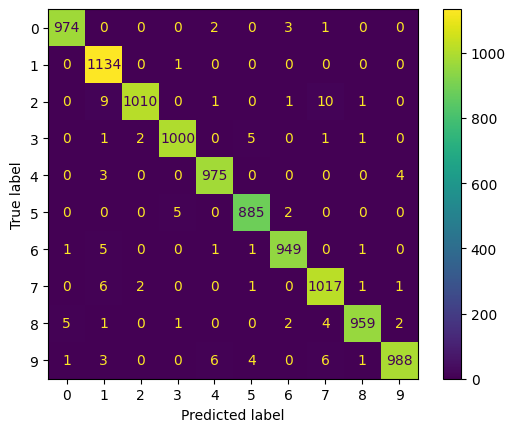

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Save above model for future use

In [50]:
model.save('digit_model.keres')

## Load above model

In [51]:
from keras.models import load_model
nn = load_model('/content/digit_model.keras')

In [52]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [53]:
# Loading the image
import cv2
img = cv2.imread('/content/example_img (3).jpg', cv2.IMREAD_GRAYSCALE)
img

array([[  1,   1,   0,   1,   0,   0,   2,   0,   2,   0,   0,   2,   0,
          0,   2,   1,   1,   0,   0,   0,   3,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   3,   2,   0,   1,   0,   3,   3,   0,   0,
          0,   0,   0,   0,   4,   0,   2,   2,   0,   1,   0,   0,   0,
          0,   0],
       [  1,   2,   1,   1,   0,   0,   4,   0,   0,   0,   0,   0,   2,
          0,   0,   5,   2,   0,   0,   0,   0,   5,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   1,   0,   2,   2,   0,   2,   0,   1,   1,   0,   0,
          1,   0,   0,   0,   6,   0,   2,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   1,   5,   0,  75, 224, 253, 254, 255, 252, 253, 255, 255,
        255, 255, 253, 254, 220, 105,   0,   4,   0,   0,   2,   0,   0,
          0,   0],
       [  2,   0,   0,   3, 221, 253, 255, 255, 255, 255, 255, 255, 253,
        254, 255, 255, 254, 255, 255, 255, 216, 125,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 123, 253, 255, 254, 254, 255, 253, 253, 255,
        255, 252, 253, 255, 255, 255, 254, 255, 254,   0,   1,   0,   0,
          0,   0],
       [  0,   2,   2,   0,   3,   1,   0,   2,   1,   1,   0,   2,   0,
          3,  96, 224, 254, 255, 254, 255, 254, 171,   2,   0,   0,   0,
          0,   0],
       [  1,   0,   2,   0,   0,   0,   0,   0,   0,   1,   0,   0,  95,
        223, 255, 253, 252, 255, 253, 255, 166,  11,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,   2,   0,   0, 132, 253,
        253, 255, 255, 255, 255, 165,   8,   4,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0,   0,  71, 222, 255, 248, 255,
        255, 253, 169,   8,   0,   0,   6,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  1,   0,   3,   1,   0,   3,   3,  69, 237, 255, 255, 254, 254,
        255, 224,  94,   2,   2,   0,   0,   2,   0,   2,   0,   0,   0,
          0,   0],
       [  1,   1,   0,   1,   1,   0,   0, 225, 254, 251, 255, 253, 255,
        255, 249, 255, 219,  96,   2,   0,   1,   0,   2,   0,   0,   0,
          0,   0],
       [  1,   0,   1,   0,   0,   2,   0, 120, 255, 254, 254, 253, 252,
        255, 255, 254, 255, 243, 103,   0,   0,   5,   0,   3,   0,   0,
          0,   0],
       [  0,   1,   0,   0,   2,   0,   1,   0,   1,   1,   0,   5,   3,
        118, 255, 253, 250, 255, 255, 221,  95,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   4,   0,   1,   0,   1,   0,   0,   3,   0,   3,
          0,   0, 121, 255, 255, 252, 255, 248,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   4,   0,   0,   1,   0,   1,   1,   1,   0,   0,   0,
          2,   0,   1,  10, 155, 255, 255, 250,   3,   1,   0,   0,   0,
          0,   0],
       [  1,   0,   0,   0,   2,   0,   1,   0,   0,   0,   2,   2,   0,
          0,   0,   0,   0,   2, 255, 254, 255,   0,   0,   4,   0,   0,
          0,   0],
       [  0,   3,   2,   0,   1,   2,   3,   0,   1,   0,   0,   1,   0,
          0,   3,   2,   2,   0, 254, 255, 254,   2,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   6,   0,   0,   0,   1,   0,   2,   0,   2,   0,
          3,   0,   0,   0,   1, 254, 255, 252,   3,   0,   2,   0,   0,
          0,   0],
       [  4,   0,   2,   0,   0,   3,  75, 221, 223,  96,   0,   2,   0,
          0,   0,   6,   0, 125, 254, 255, 255,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   5,   1,   0,   0,   1, 216, 255, 255, 243,  98,   0,   2,
          2,   0,  72, 224, 255, 255, 255, 166,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   5,   2,   1, 126, 253, 255, 254, 255, 255, 255,
        255, 255, 255, 255, 255, 253, 183,   9,   1,   0,   0,   0,   0,
          0,   0],
       [  3,   0,   3,   0,   2,   0,   3, 120, 255, 253, 255, 254, 254,
        253, 255, 253, 254, 255, 167,   8,   2,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [54]:
img_scl = img.astype('float32')/255

In [55]:
probs = model.predict(np.array([img_scl]))

1/1 [==============================] - 0s 128ms/step


In [56]:
probs

array([[5.9738430e-25, 7.4221611e-16, 1.9302323e-19, 1.0000000e+00,
        9.1010915e-20, 4.3560946e-09, 5.5474436e-22, 1.4677784e-17,
        7.5563693e-18, 8.5609742e-13]], dtype=float32)

In [57]:
pred = np.argmax(probs)

In [58]:
pred

3

In [59]:
prob = np.max(probs)
prob

1.0

In [67]:
def predict_number(path):
   img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
   plt.imshow(img, cmap = 'gray')
   plt.show()
   img_scl = img.astype('float32')/255
   probs = model.predict(np.array([img_scl]))
   pred = np.argmax(probs)
   prob = np.max(probs)
   return pred, prob

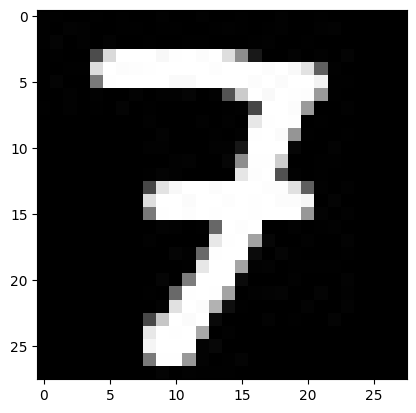

1/1 [==============================] - 0s 30ms/step


(7, 0.9998996)

In [68]:
predict_number('/content/example_img2 (3).jpg')

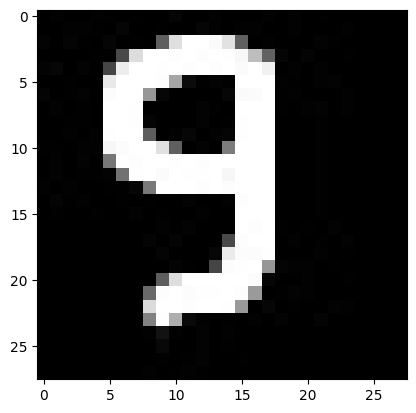

1/1 [==============================] - 0s 74ms/step


(4, 0.99991536)

In [69]:
predict_number('/content/example_img3 (3).jpg')